In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string
from wordcloud import WordCloud
import en_core_web_sm
import spacy
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
data = pd.read_csv("/content/drive/MyDrive/data_new .csv")

In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
def lemmatization(df):
    df["Lemmas"] = [" ".join([token.lemma_ if token.lemma_ != "-PRON - " else token.text.lower()
                             for sentence in nlp(speech).sents for token in sentence if
                             token.pos_ in {"NOUN", "VERB", "ADJ", "ADV", "X"} and
                             token.is_stop == False]) for speech in df.text]


In [6]:
data["Lemmas"] = [" ".join([token.lemma_ if token.lemma_ != "-PRON-"
                          else token.text.lower() for sentence in
                          nlp(speech).sents for token in sentence if
                          token.pos_ in {"NOUN", "VERB", "ADJ", "ADV", "X"}
                          and token.is_stop == False]) for speech in data['Review Text']]

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
sid = SentimentIntensityAnalyzer()
sentiment = []
for i in range(len(data)):
    ss = sid.polarity_scores(data.Lemmas[i])
    sentiment.append(ss)

compound = [sentiment[i]['compound'] for i in range(len(sentiment))]
data['compound'] = compound

In [10]:
def true_false(n):
    if 4/5 < n :
        return 5
    elif 3/5 < n <= 4/5:
        return 4
    elif 2/5 < n <= 3/5:
        return 3
    elif 1/5 < n <= 2/5:
        return 2
    else:
        return 1

In [11]:
l = []
for i in range(len(data)):
    if data['Rating'][i] != true_false(data['compound'][i]):
        l.append('False')
    else:
        l.append('True')

In [12]:
data['True_False'] = l

In [13]:
sent = []
for i in compound:
    if i < -0.3:
        sent.append('negative')
    elif i > 0.3:
        sent.append('positive')
    else:
        sent.append('neutral')
data['sentiment']=sent

In [14]:
mat = np.zeros(4).reshape(2, 2)
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
for i in range(len(data)):
    if data['sentiment'][i] == 'negative' and data['Recommended IND'][i] == 0:
        true_neg += 1
    elif data['sentiment'][i] == 'positive' and data['Recommended IND'][i] == 1:
        true_pos += 1
    elif data['sentiment'][i] == 'positive' and data['Recommended IND'][i] == 0:
        false_neg += 1
    elif data['sentiment'][i] == 'negative' and data['Recommended IND'][i] == 1:
        false_pos += 1

mat[0][0] = true_neg
mat[0][1] = false_neg
mat[1][0] = false_pos
mat[1][1] = true_pos

In [15]:
from pandas import DataFrame
Index= ['Not Recommended', 'Recommended']
Cols = ['Negative', 'Positive']
d = DataFrame(mat, index=Index, columns=Cols)

In [16]:
d

,Negative,Positive
Not Recommended,245.0,2747.0
Recommended,96.0,15487.0


In [17]:
data

,Unnamed: 0,Unnamed: 0.1,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,...,tokenized_review,Tokenized_Review_str,stemmed_clean_tokenized,Stemmed_Review_str,lemmatisation,Lemmatisation_Review_str,Lemmas,compound,True_False,sentiment
0,0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,...,"['design', 'major', 'high', 'hopes', 'dress', ...",", design, major, high, hopes, dress, really, w...","['design', 'maj', 'high', 'hop', 'dress', 'rea...",", design, maj, high, hop, dress, real, want, w...","['design', 'major', 'high', 'hope', 'dress', '...",", design, major, high, hope, dress, really, wa...",high hope dress want work initially order peti...,0.8658,False,positive
1,1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,...,"['buy', 'favorite', 'love', 'love', 'love', 'j...",", buy, favorite, love, love, love, jumpsuit, f...","['buy', 'favorit', 'lov', 'lov', 'lov', 'jumps...",", buy, favorit, lov, lov, lov, jumpsuit, fun, ...","['buy', 'favorite', 'love', 'love', 'love', 'j...",", buy, favorite, love, love, love, jumpsuit, f...",love love love jumpsuit fun flirty fabulous ti...,0.9819,True,positive
2,2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,...,"['flattering', 'shirt', 'flattering', 'due', '...",", flattering, shirt, flattering, due, adjustab...","['flat', 'shirt', 'flat', 'due', 'adjust', 'fr...",", flat, shirt, flat, due, adjust, front, tie, ...","['flattering', 'shirt', 'flattering', 'due', '...",", flattering, shirt, flattering, due, adjustab...",shirt flattering adjustable tie perfect length...,0.8807,True,positive
3,3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,...,"['love', 'tracy', 'reese', 'dresses', 'one', '...",", love, tracy, reese, dresses, one, petite, fe...","['lov', 'tracy', 'rees', 'dress', 'on', 'petit...",", lov, tracy, rees, dress, on, petit, feet, ta...","['love', 'tracy', 'reese', 'dress', 'one', 'pe...",", love, tracy, reese, dress, one, petite, foot...",love dress petite foot tall usually wear 0p br...,0.8979,False,positive
4,4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,...,"['shimmer', 'cagrcoal', 'aded', 'basket', 'hte...",", shimmer, cagrcoal, aded, basket, hte, last, ...","['shim', 'cagrco', 'ad', 'basket', 'hte', 'las...",", shim, cagrco, ad, basket, hte, last, mintu, ...","['shimmer', 'cagrcoal', 'aded', 'basket', 'hte...",", shimmer, cagrcoal, aded, basket, hte, last, ...",ade basket mintue look person store pick go da...,0.3400,False,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,19657,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,...,"['many', 'dress', 'great', 'happy', 'snag', 'd...",", many, dress, great, happy, snag, dress, grea...","['many', 'dress', 'gre', 'happy', 'snag', 'dre...",", many, dress, gre, happy, snag, dress, gre, p...","['many', 'dress', 'great', 'happy', 'snag', 'd...",", many, dress, great, happy, snag, dress, grea...",happy snag dress great price easy slip flatter...,0.8979,True,positive
19658,19658,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,...,"['made', 'wish', 'reminds', 'maternity', 'clot...",", made, wish, reminds, maternity, clothes, sof...","['mad', 'wish', 'remind', 'matern', 'cloth', '...",", mad, wish, remind, matern, cloth, soft, stre...","['made', 'wish', 'reminds', 'maternity', 'clot...",", made, wish, reminds, maternity, clothes, sof...",remind maternity clothe soft stretchy shiny ma...,0.7506,False,positive
19659,19659,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,...,"['see', 'cute', 'fit', 'well

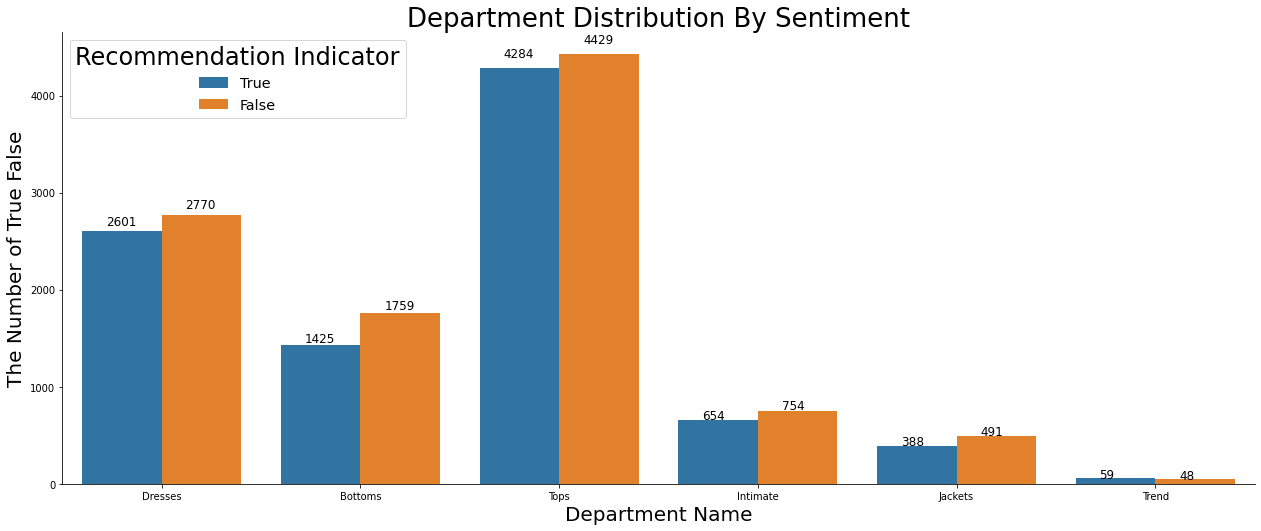

In [22]:
g = sns.catplot(data = data, x ="Department Name", hue = "True_False", kind='count', height=7, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Sentiment', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of True False", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='upper left', labels=['True', 'False'], fontsize='x-large', title_fontsize='24')

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.12, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

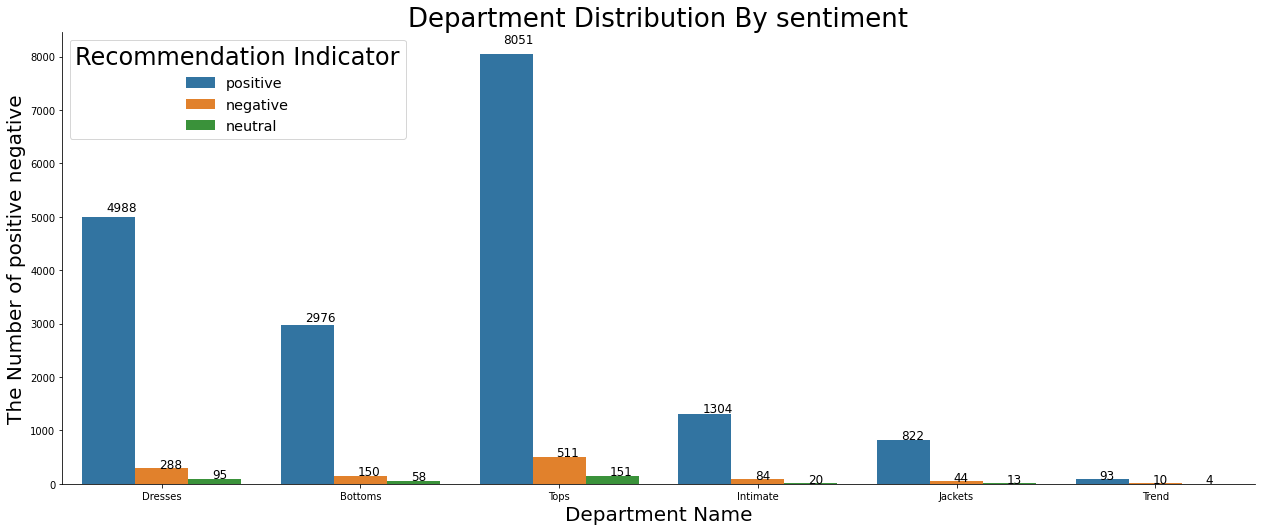

In [77]:
g = sns.catplot(data = data, x ="Department Name", hue = "sentiment", kind='count', height=7, aspect=2.5, legend_out=False)

plt.title('Department Distribution By sentiment', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of positive negative", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='upper left', labels=['positive', 'negative', 'neutral'], fontsize='x-large', title_fontsize='24')

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.12, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

In [24]:
punc = set(string.punctuation)
number = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [25]:
def word_by_word(comment):
    list_word = []
    word = ""
    for c in range(len(comment)):
        if comment[c] != " " and comment[c] not in punc:
            if comment[c] not in number:
                word = word + str(comment[c])
            else:
                word = ""
                c += 1
        else:
            if word != "" and len(word) >= 3:
                list_word.append(word.lower())
            word = ""
            c += 1

    if len(list_word) == 0:
        list_word.append("")

    return list_word

In [26]:
comment_list_word = []
for i in range(len(data)):
    m_1 = word_by_word(data['Stemmed_Review_str'][i])
    comment_list_word.append(m_1)
data['list_word'] = comment_list_word

In [27]:
def list_rating_word():
    list_n = [[], [], [], [], []]

    for index in range(len(data)):
        for word in data['list_word'][index]:
            list_n[data['Rating'][index] - 1].append(word)
    return list_n


In [28]:
word_according_rating = list_rating_word()

In [31]:
def value_word(word, list_n):
    value = 0
    for index in range(5):
        value += list_n[index].count(word) * (index - 2)
    return value

In [29]:
def word_value_list_2(func, list_n):
    list_word_value = [[], []]
    for index in range(len(list_n)):
        for word in list_n[index]:
            if word not in list_word_value[0]:
                list_word_value[0].append(word)
                list_word_value[1].append(func(word, list_n))

    return list_word_value

In [92]:
k = word_value_list_2(value_word, word_according_rating)

In [34]:
max(k[1])

16315

In [35]:
min(k[1])

-221

In [ ]:
new_compound = []

In [36]:
data['Stemmed_Review_str'][0]

', design, maj, high, hop, dress, real, want, work, init, ord, petit, smal, us, siz, found, out, smal, smal, fact, could, zip, reord, petit, med, overal, top, half, comfort, fit, nic, bottom, half, tight, lay, sev, somewh, cheap, net, lay, imo, maj, design, flaw, net, lay, sewn, direct, zip'

In [41]:
result = []
for i in range(len(data)):
  count = 0
  for j in word_by_word(data['Stemmed_Review_str'][i]):
    a = k[0].index(j)
    count += k[1][a]
  result.append(count/max(k[1]))


In [44]:
max(result)/100

0.15497211155378485

In [45]:
min(result)

0.020349371743794056

In [71]:
new_compound = []
for i in range(len(data)):
  new_compound.append(result[i]/50+data['compound'][i])


In [72]:
max(new_compound)

1.2808442231075696

In [73]:
data['new_compound'] = new_compound

In [74]:
l = []
for i in range(len(data)):
    if data['Rating'][i] != true_false(data['new_compound'][i]):
        l.append('False')
    else:
        l.append('True')

In [75]:
data['True_False_2'] = l

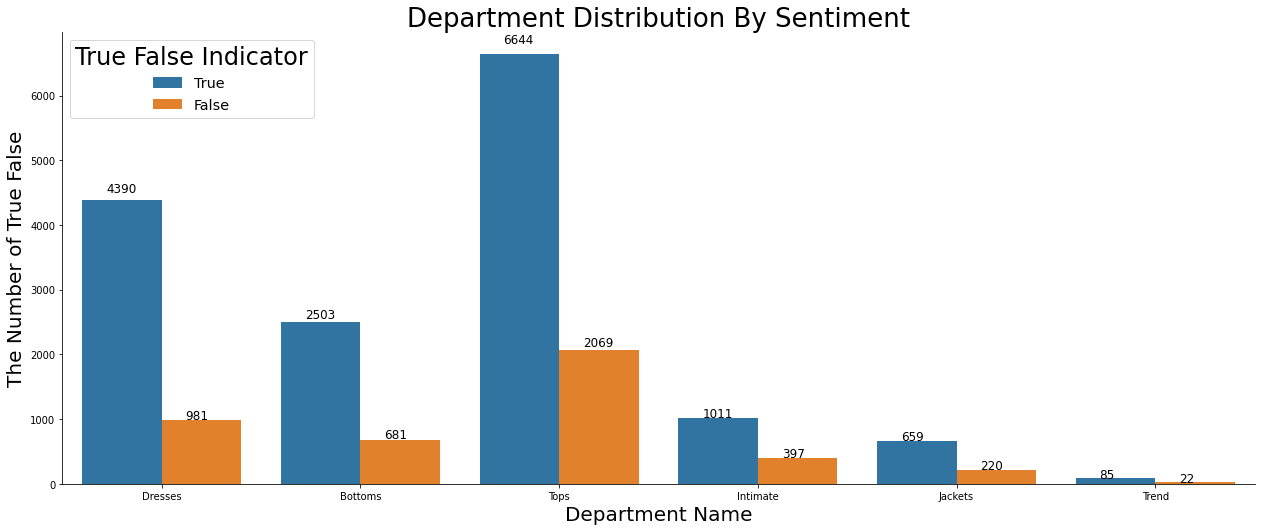

In [76]:
g = sns.catplot(data = data, x ="Department Name", hue = "True_False_2", kind='count', height=7, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Sentiment', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of True False", fontsize=20)
plt.legend(title='True False Indicator', loc='upper left', labels=['True', 'False'], fontsize='x-large', title_fontsize='24')

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.12, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()